In [1]:
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 50s 0us/step


In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
import matplotlib.pyplot as plt

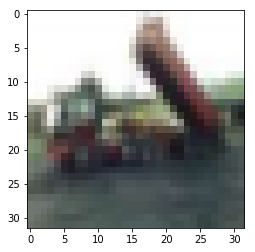

In [6]:
plt.imshow(x_train[2])

In [7]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [51]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total para

In [25]:
from keras.utils import to_categorical

In [26]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [27]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [53]:
model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 51s 1ms/step - loss: 1.5134 - acc: 0.4546
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/step - loss: 1.1118 - acc: 0.6088
Epoch 3/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9548 - acc: 0.6663
Epoch 4/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8533 - acc: 0.7056
Epoch 5/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.8057 - acc: 0.7249
Epoch 6/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7776 - acc: 0.7348
Epoch 7/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7518 - acc: 0.7439
Epoch 8/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7281 - acc: 0.7529
Epoch 9/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7104 - acc: 0.7592
Epoch 10/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.6944 - acc: 0.7648

In [41]:
# model.fit(x_train, y_cat_train, epochs=10)

In [32]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 175us/step


[1.7869389276504517, 0.667]

In [33]:
from sklearn.metrics import classification_report

In [34]:
prediction = model.predict_classes(x_test)

In [36]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.63      0.75      0.68      1000
          1       0.84      0.80      0.82      1000
          2       0.57      0.56      0.56      1000
          3       0.52      0.41      0.46      1000
          4       0.58      0.67      0.62      1000
          5       0.63      0.48      0.55      1000
          6       0.82      0.66      0.74      1000
          7       0.72      0.67      0.69      1000
          8       0.71      0.83      0.77      1000
          9       0.66      0.83      0.74      1000

avg / total       0.67      0.67      0.66     10000

